In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ETL

In [54]:
# 1. Extract: Загрузка данных
df = pd.read_csv('data/Superstore.csv', encoding='ISO-8859-1')

In [55]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [56]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [57]:
# 2. Transform: Очистка и обработка
# Проверка дубликатов
df.drop_duplicates(inplace=True)

In [58]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [59]:
# Проверка пропусков и их обработка
df.fillna({'Discount': 0, 'Profit': 0}, inplace=True)  # Заполняем пропуски в числовых колонках

In [60]:
# Преобразование типов данных
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Sales'] = df['Sales'].astype(float)
df['Profit'] = df['Profit'].astype(float)

In [61]:
# Фильтруем нереальные выбросы
df_cleaned = df[(df["Quantity"] <= 1000) & (df["Profit"] >= -df["Sales"])]

# Проверяем размеры до и после
print(f"До фильтрации: {df.shape[0]} строк")
print(f"После фильтрации: {df_cleaned.shape[0]} строк")
df = df_cleaned

До фильтрации: 9994 строк
После фильтрации: 9645 строк


In [62]:
# 3. Load: Сохранение обработанных данных
df_cleaned.to_csv('data/Superstore_Cleaned.csv', index=False)

In [80]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


EDA

In [64]:
# 1. Основная информация о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9645 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9645 non-null   int64         
 1   Order ID       9645 non-null   object        
 2   Order Date     9645 non-null   datetime64[ns]
 3   Ship Date      9645 non-null   datetime64[ns]
 4   Ship Mode      9645 non-null   object        
 5   Customer ID    9645 non-null   object        
 6   Customer Name  9645 non-null   object        
 7   Segment        9645 non-null   object        
 8   Country        9645 non-null   object        
 9   City           9645 non-null   object        
 10  State          9645 non-null   object        
 11  Postal Code    9645 non-null   int64         
 12  Region         9645 non-null   object        
 13  Product ID     9645 non-null   object        
 14  Category       9645 non-null   object        
 15  Sub-Category   9645 non-nu

In [65]:
# Средние значения
print(round(df[["Sales", "Profit", "Discount"]].mean(), 2))

Sales       234.66
Profit       35.33
Discount      0.13
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_8808\3444479545.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




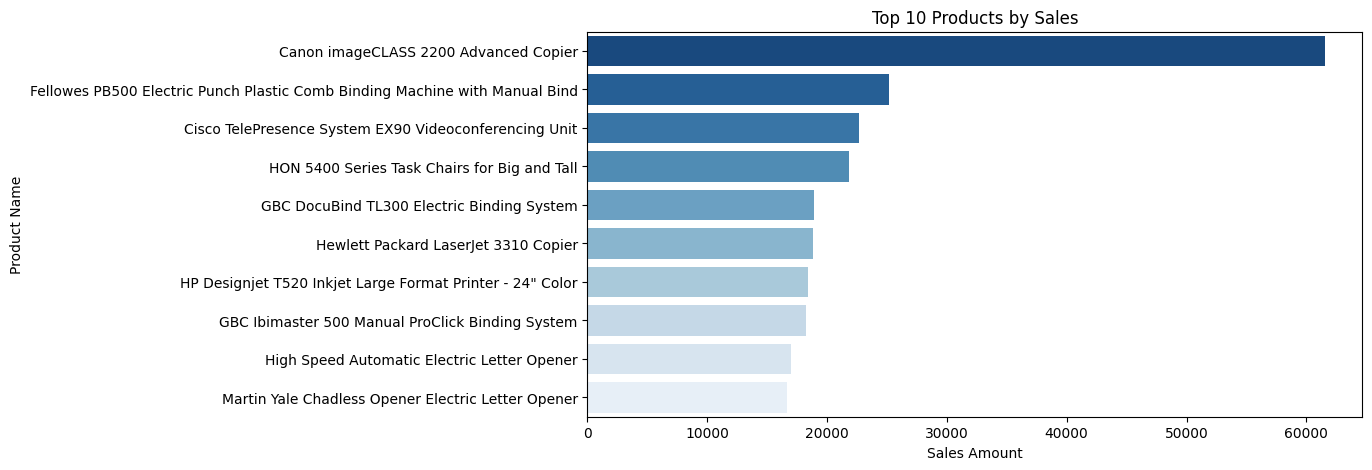

In [67]:
# Топ-10 товаров по продажам
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales Amount")
plt.show()

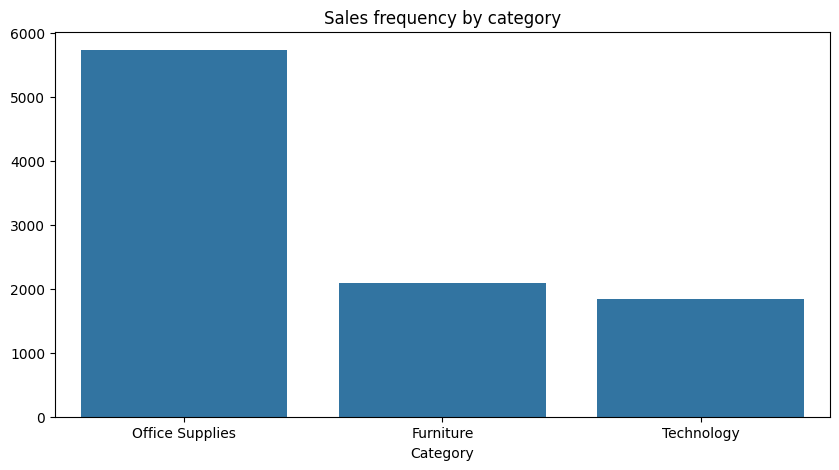

In [81]:
# 3. Топ самых продаваемых категорий
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title('Sales frequency by category')
plt.show()

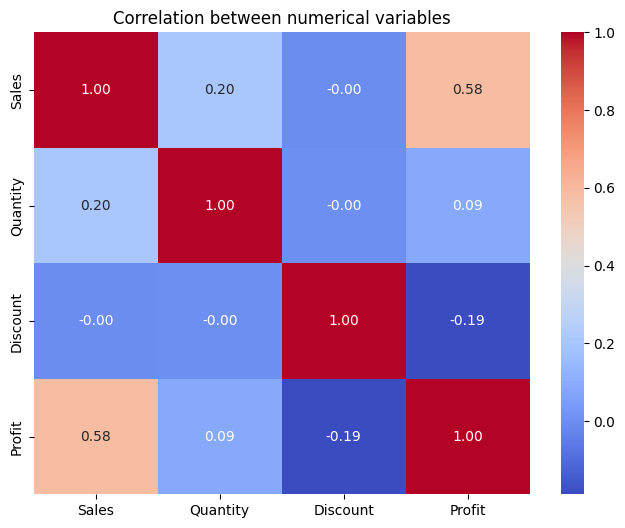

In [82]:
# 4. Тепловая карта корреляций
df_numeric = df.select_dtypes(include=[np.number]).drop(['Row ID', 'Postal Code'], axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between numerical variables')
plt.show()

In [70]:
# 5. Динамика продаж во времени
fig = px.line(df.groupby('Order Date')['Sales'].sum().reset_index(), x='Order Date', y='Sales', title='Динамика продаж')
fig.show()

In [71]:
# 6. Прибыль по регионам
fig = px.bar(df.groupby('Region')['Profit'].sum().reset_index(), x='Region', y='Profit', title='Прибыль по регионам', color='Profit')
fig.show()


In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Агрегация данных по клиентам
customer_df = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (df['Order Date'].max() - x.max()).days,  # Recency: дни с последней покупки
    'Order ID': 'nunique',  # Frequency: количество уникальных заказов
    'Sales': 'sum'  # Monetary: общая сумма покупок
}).reset_index()

customer_df.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Нормализация данных
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'Monetary']])

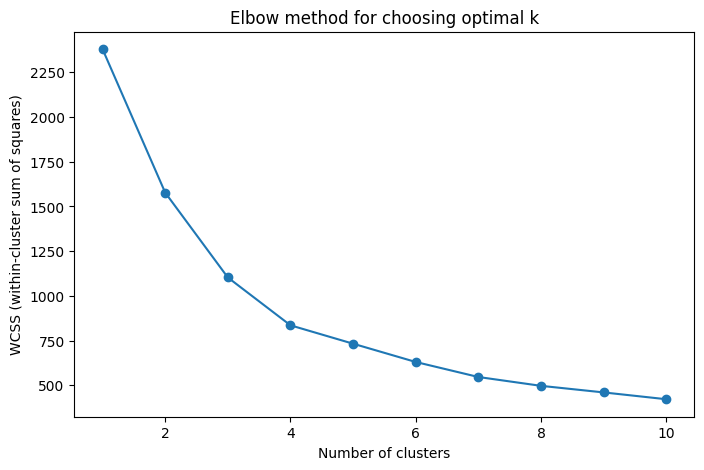

In [83]:
# Метод локтя для определения оптимального количества кластеров
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_scaled)
    wcss.append(kmeans.inertia_)

# График метода локтя
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (within-cluster sum of squares)')
plt.title('Elbow method for choosing optimal k')
plt.show()

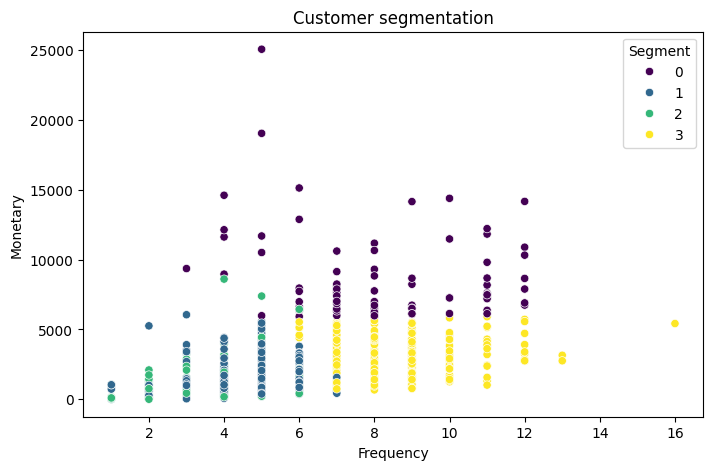

In [84]:
# Кластеризация K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Segment'] = kmeans.fit_predict(customer_scaled)

# Визуализация сегментов
plt.figure(figsize=(8, 5))
sns.scatterplot(x=customer_df['Frequency'], y=customer_df['Monetary'], hue=customer_df['Segment'], palette='viridis')
plt.title('Customer segmentation')
plt.show()

# Сохранение сегментированных данных
customer_df.to_csv('data/Customer_Segments.csv', index=False)

In [75]:
print(customer_df.drop(['Customer ID'], axis=1).groupby('Segment').mean())

            Recency  Frequency     Monetary
Segment                                    
0        101.825000   8.150000  8721.327745
1        103.945619   4.586103  1680.460909
2        564.530612   3.642857  1484.077874
3         72.528169   8.380282  3041.882448


C:\Users\User\AppData\Local\Temp\ipykernel_8808\99345772.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




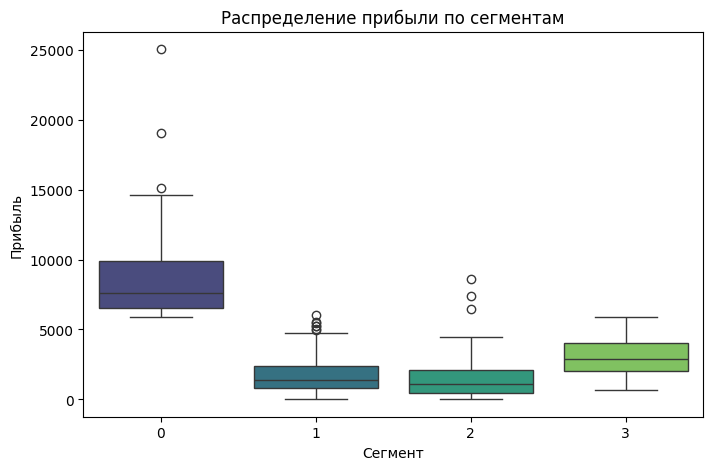

In [76]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='Monetary', data=customer_df, palette='viridis')
plt.xlabel('Сегмент')
plt.ylabel('Прибыль')
plt.title('Распределение прибыли по сегментам')
plt.show()

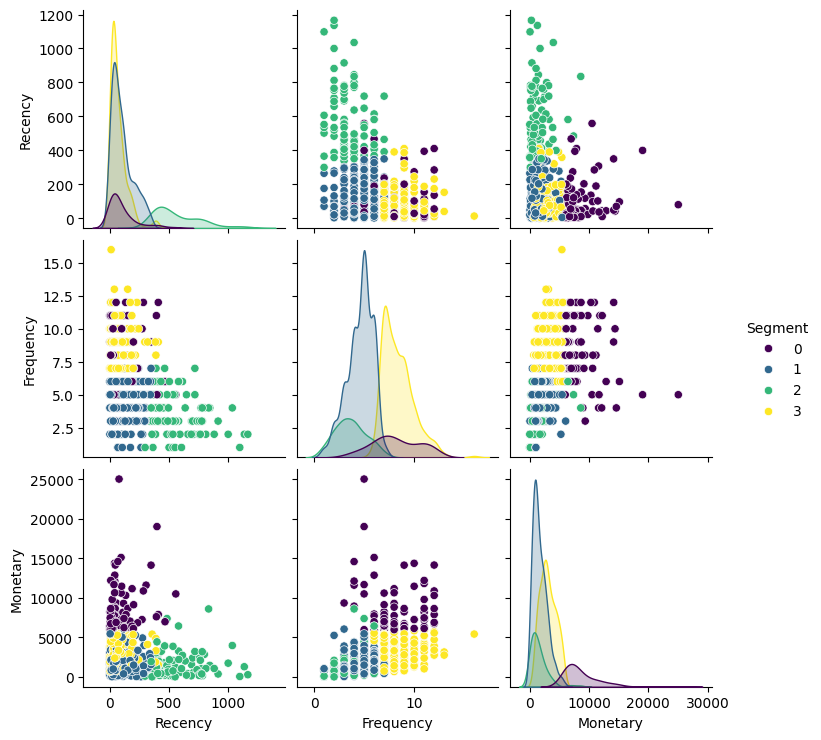

In [77]:
sns.pairplot(customer_df, hue='Segment', palette='viridis')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8808\1909413271.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




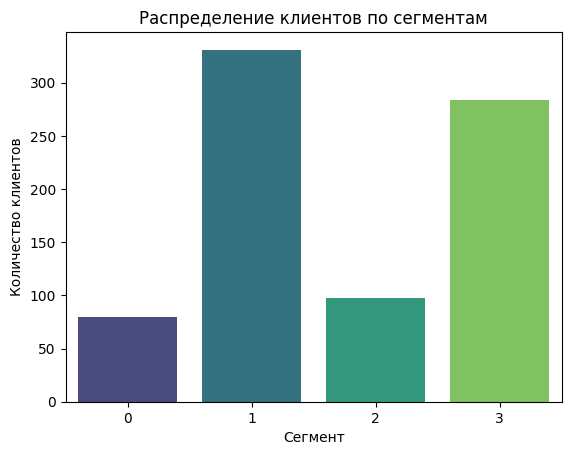

In [78]:
sns.countplot(x='Segment', data=customer_df, palette='viridis')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по сегментам')
plt.show()
